In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [13]:
df = pd.read_csv('global_terrorism.csv', encoding='latin-1')


/tmp/ipykernel_51259/1523427222.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_terrorism.csv', encoding='latin-1')


In [15]:
df.head(5)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## 1. Most Common Attack Types - Frequency Distribution

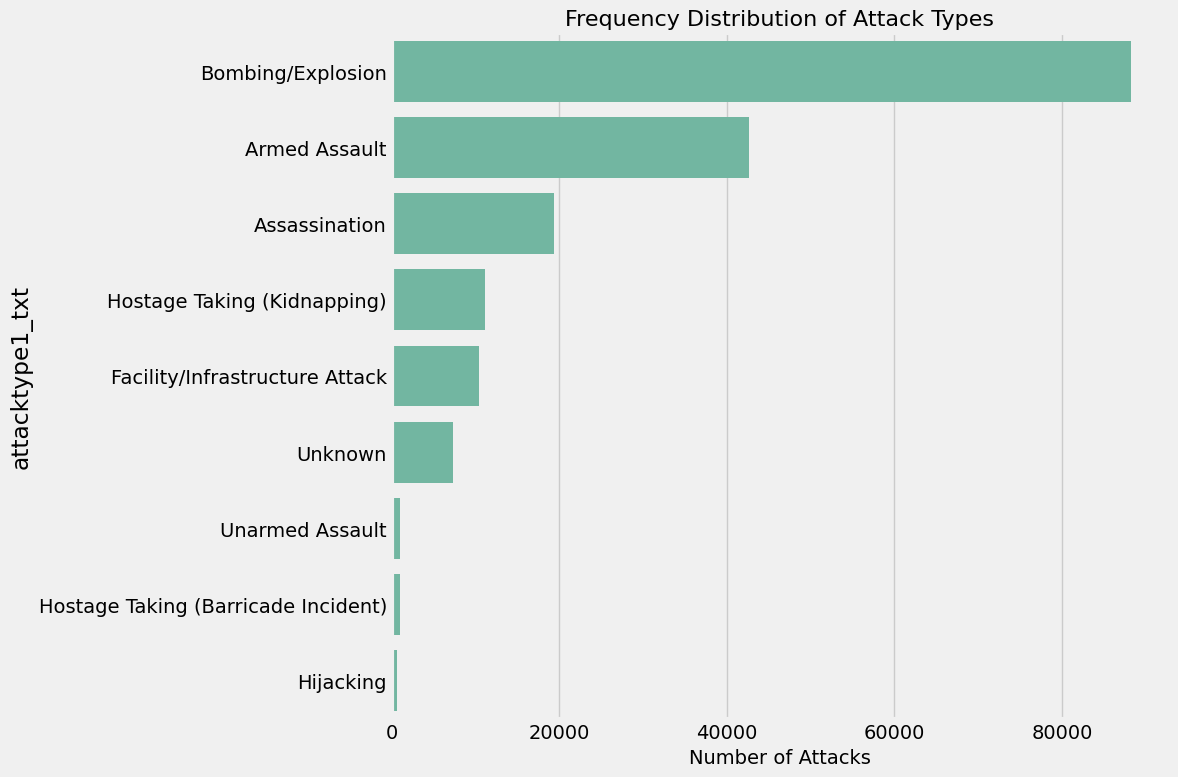

Percentage distribution of attack types:
attacktype1_txt
Bombing/Explosion                      48.57
Armed Assault                          23.48
Assassination                          10.63
Hostage Taking (Kidnapping)             6.14
Facility/Infrastructure Attack          5.70
Unknown                                 4.00
Unarmed Assault                         0.56
Hostage Taking (Barricade Incident)     0.55
Hijacking                               0.36
Name: count, dtype: float64


In [ ]:
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')

plt.figure(figsize=(12, 8))
attack_counts = df['attacktype1_txt'].value_counts()
sns.barplot(x=attack_counts.values, y=attack_counts.index)
plt.title('Frequency Distribution of Attack Types', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=14)
plt.tight_layout()
plt.show()

print("Percentage distribution of attack types:")
print((attack_counts / attack_counts.sum() * 100).round(2))


## 2. Attack Trends Over Time (1970 onwards)

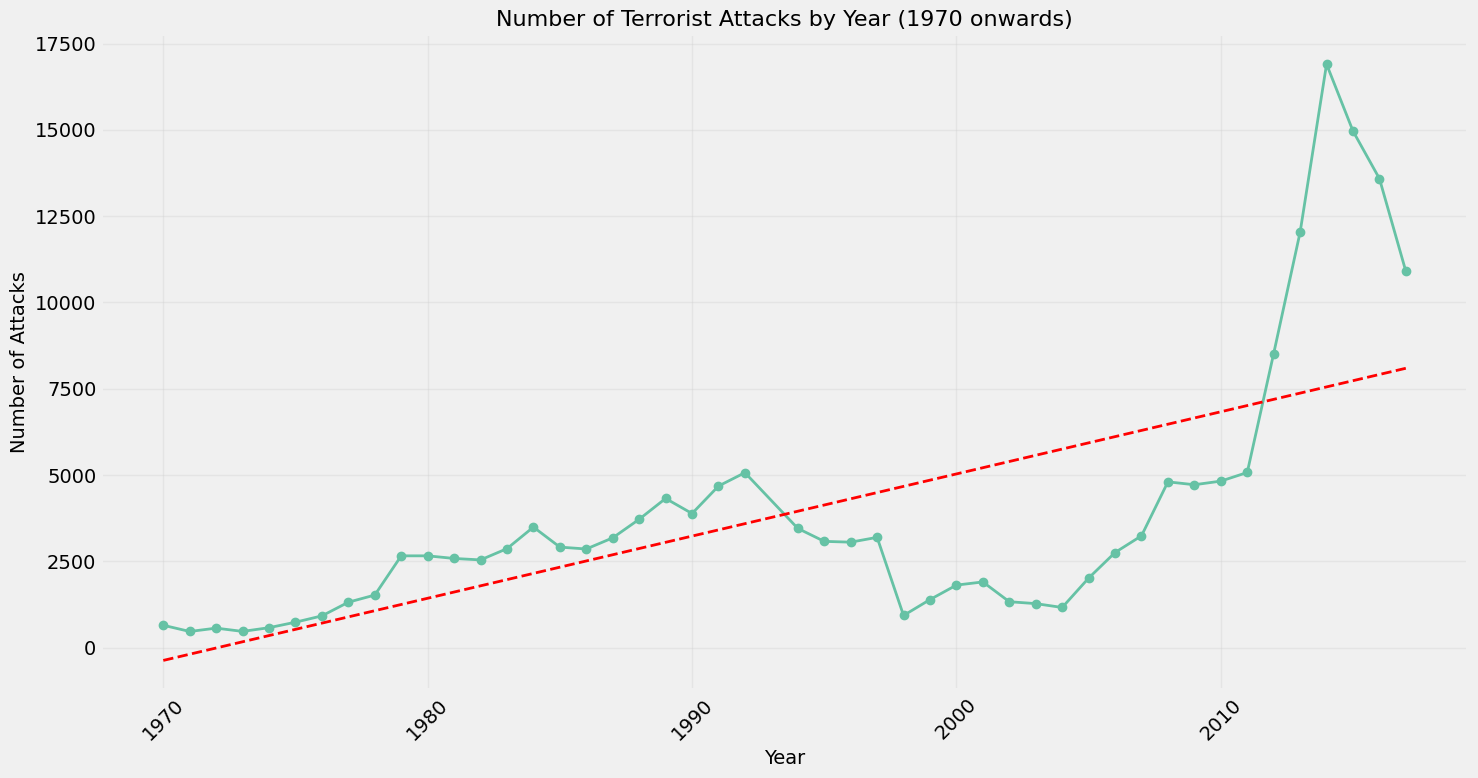

In [ ]:
if not pd.api.types.is_datetime64_dtype(df['iyear']):
    df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].assign(
        imonth=df['imonth'].clip(1, 12),
        iday=df['iday'].clip(1, 28)
    ).astype(str).agg('-'.join, axis=1), errors='coerce')

plt.figure(figsize=(15, 8))
yearly_attacks = df.groupby('iyear').size()
plt.plot(yearly_attacks.index, yearly_attacks.values, marker='o', linewidth=2)
plt.title('Number of Terrorist Attacks by Year (1970 onwards)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

z = np.polyfit(yearly_attacks.index, yearly_attacks.values, 1)
p = np.poly1d(z)
plt.plot(yearly_attacks.index, p(yearly_attacks.index), "r--", linewidth=2)
plt.tight_layout()
plt.show()


## 3. Attack Patterns by Day of Month

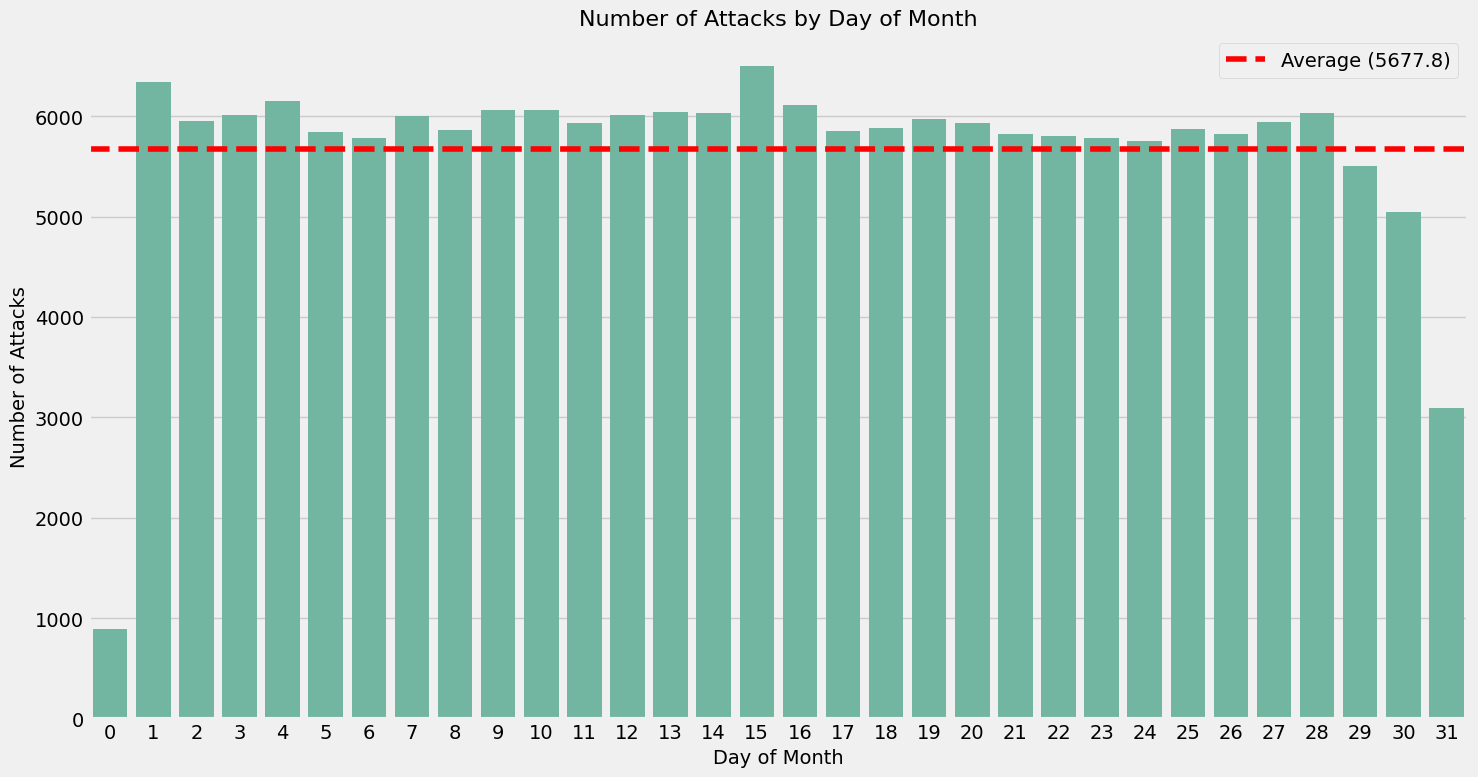

Chi-square test for uniform distribution: p-value = 0.0000
Reject null hypothesis of uniform distribution


In [ ]:
plt.figure(figsize=(15, 8))
daily_attacks = df['iday'].value_counts().sort_index()
sns.barplot(x=daily_attacks.index, y=daily_attacks.values)
plt.title('Number of Attacks by Day of Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(rotation=0)

avg_attacks = daily_attacks.mean()
plt.axhline(y=avg_attacks, color='r', linestyle='--', label=f'Average ({avg_attacks:.1f})')
plt.legend()
plt.tight_layout()
plt.show()


chi2_stat, p_value = stats.chisquare(daily_attacks)
print(f"Chi-square test for uniform distribution: p-value = {p_value:.4f}")
print(f"{'Reject' if p_value < 0.05 else 'Cannot reject'} null hypothesis of uniform distribution")


## 4. Countries with Highest Attack Counts

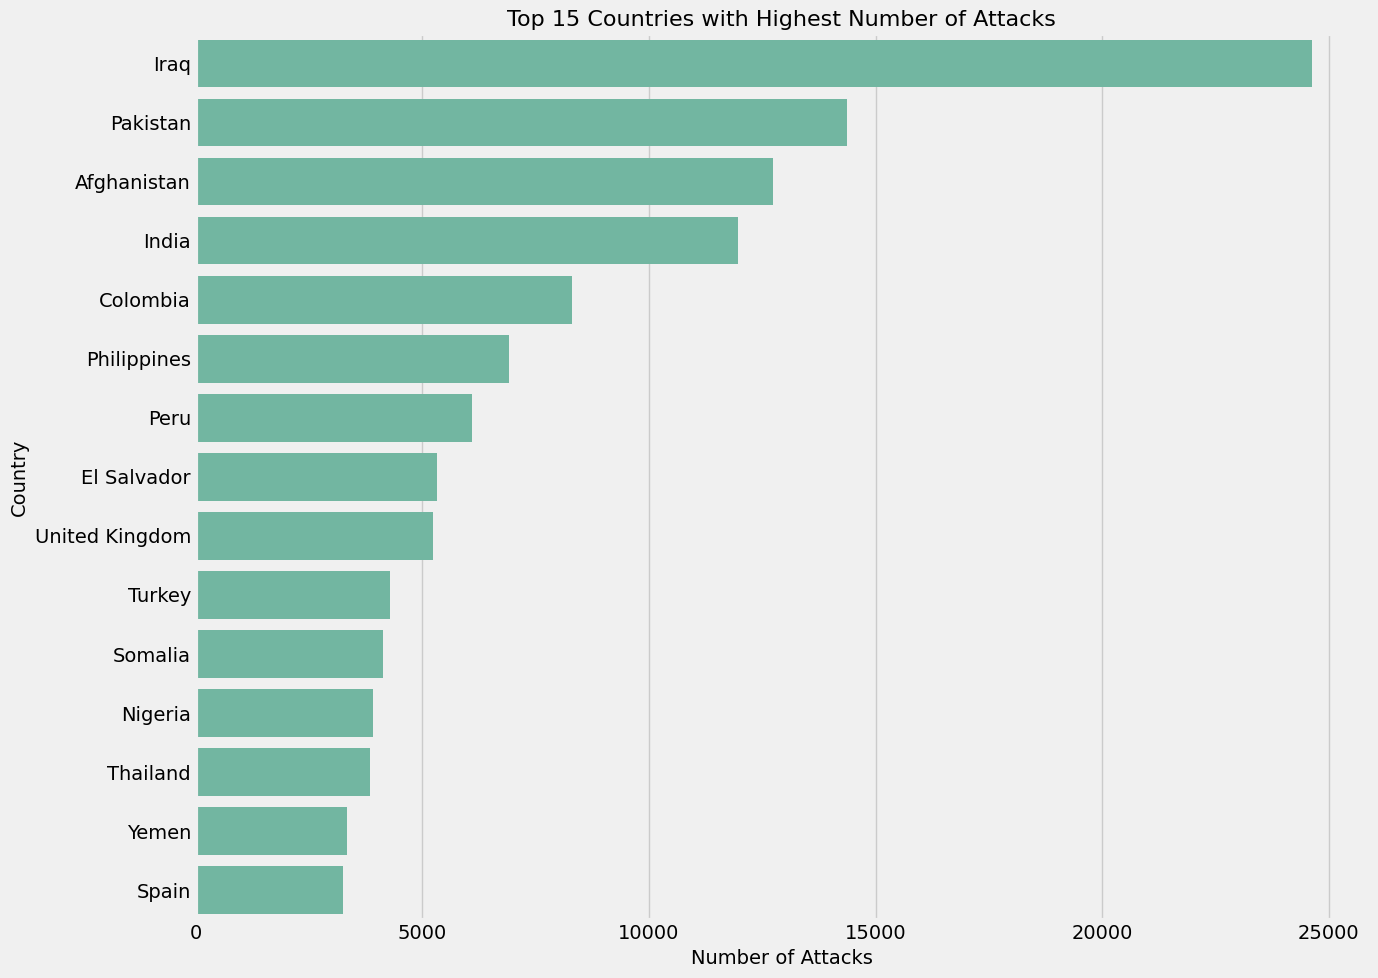

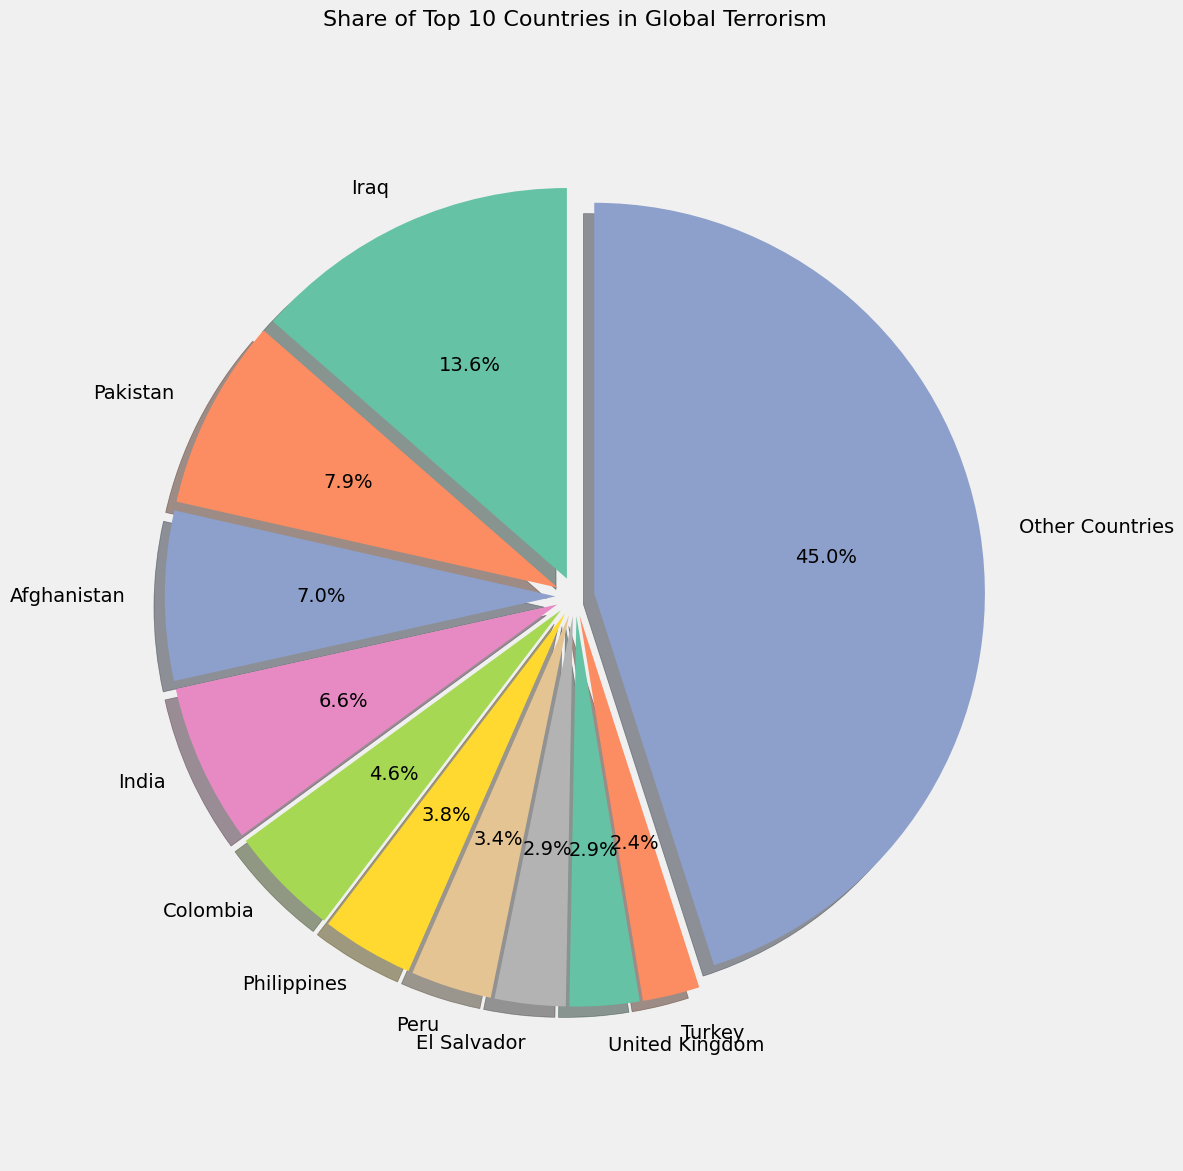

In [ ]:
plt.figure(figsize=(14, 10))
country_counts = df['country_txt'].value_counts().head(15)
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 15 Countries with Highest Number of Attacks', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 12))
top10_countries = df['country_txt'].value_counts().head(10)
other_countries = pd.Series({'Other Countries': df['country_txt'].value_counts()[10:].sum()})
combined = pd.concat([top10_countries, other_countries])
plt.pie(combined, labels=combined.index, autopct='%1.1f%%', 
        shadow=True, startangle=90, explode=[0.05]*len(combined))
plt.title('Share of Top 10 Countries in Global Terrorism', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


## 5. Regions with Highest Attack Concentration

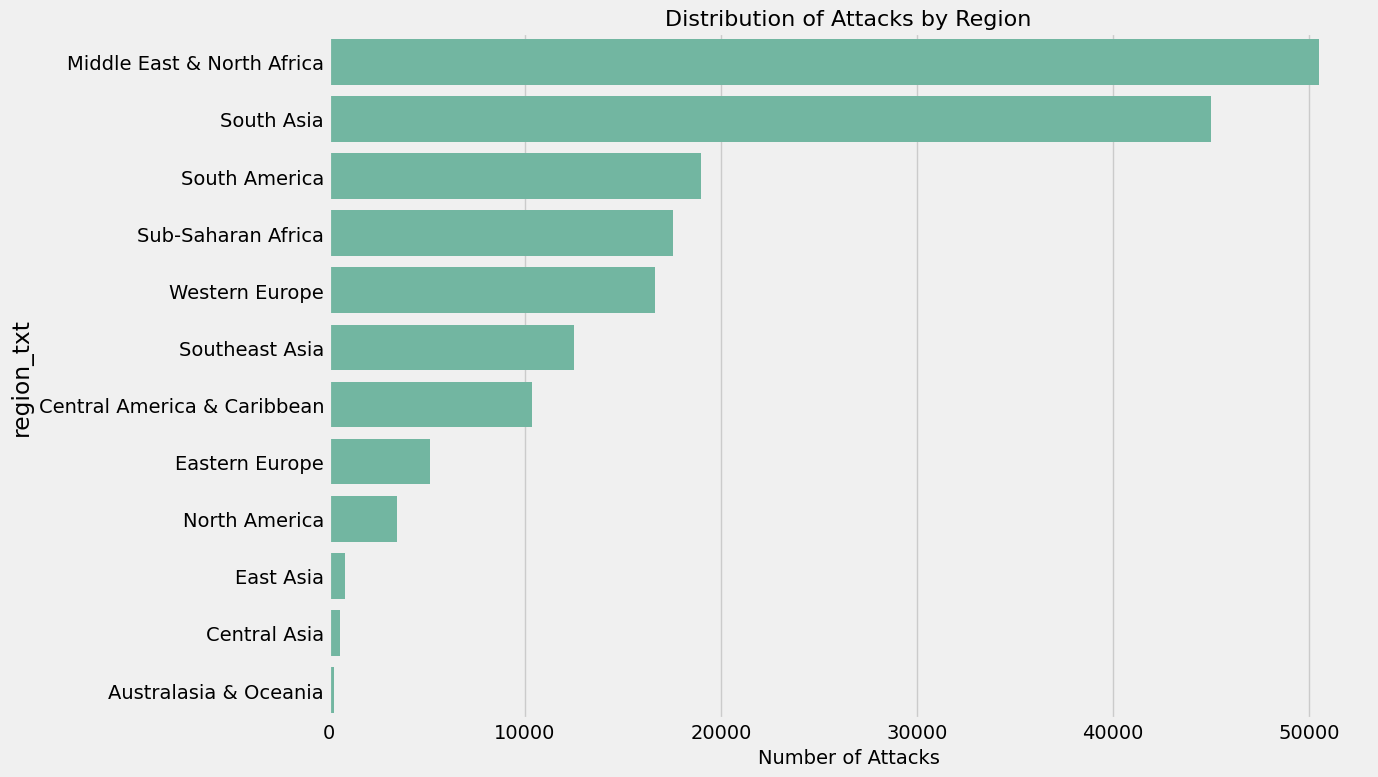

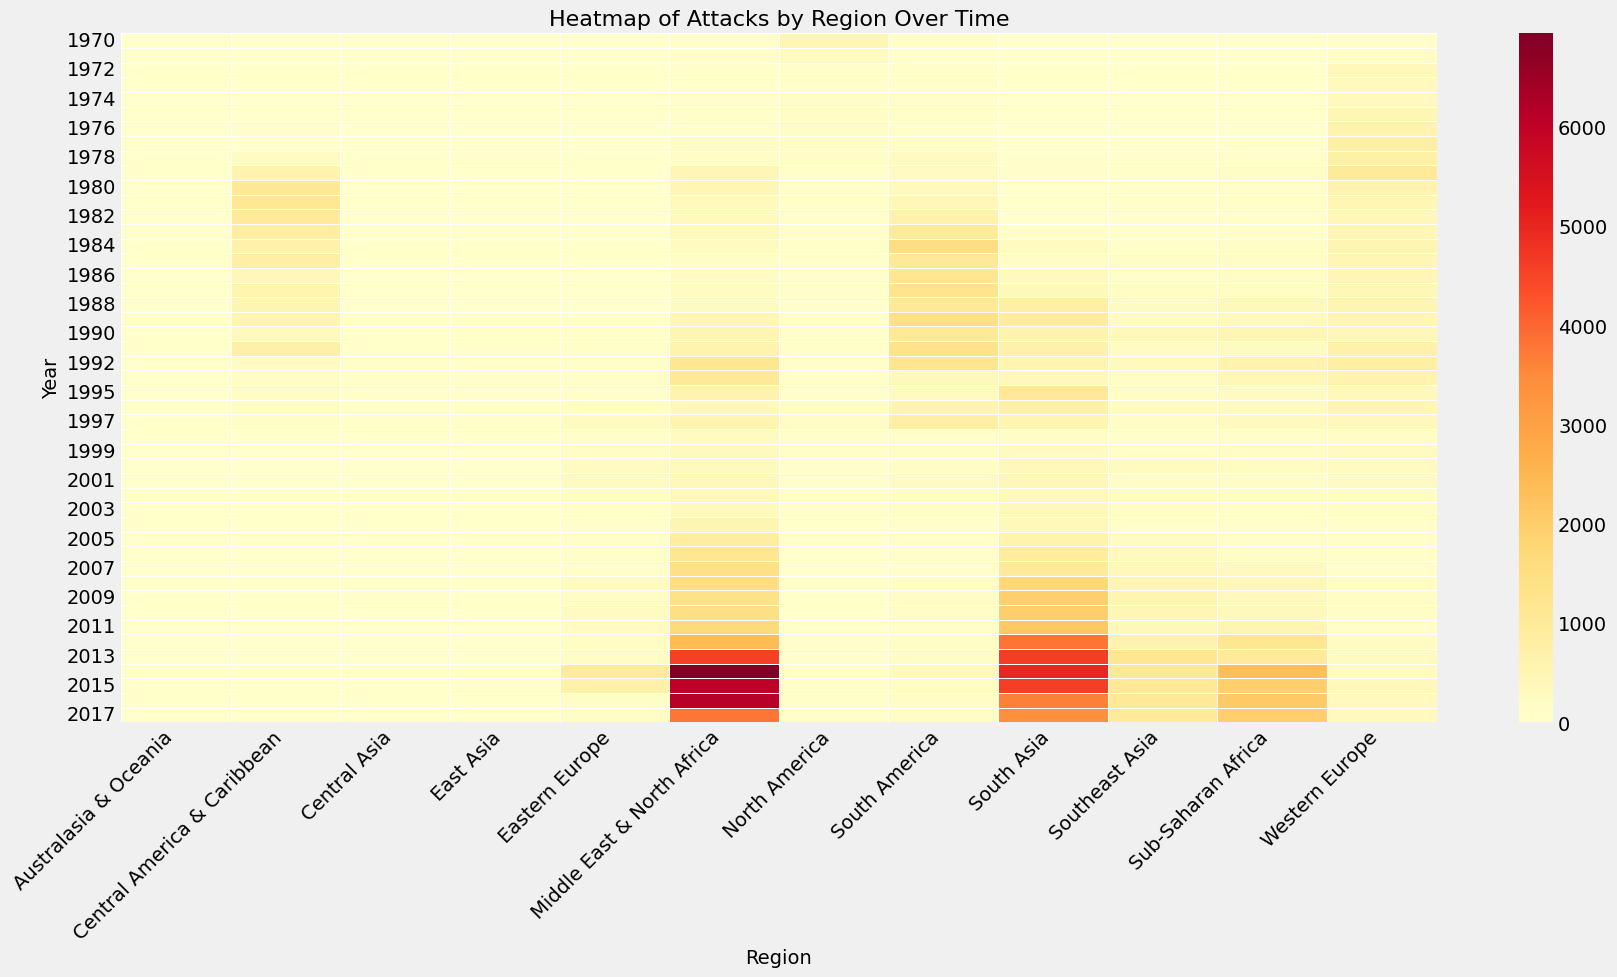

In [ ]:
plt.figure(figsize=(14, 8))
region_counts = df['region_txt'].value_counts()
sns.barplot(x=region_counts.values, y=region_counts.index)
plt.title('Distribution of Attacks by Region', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))
region_year = pd.crosstab(df['iyear'], df['region_txt'])
sns.heatmap(region_year, cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap of Attacks by Region Over Time', fontsize=16)
plt.ylabel('Year', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 6. Most Frequently Targeted Groups/Entities

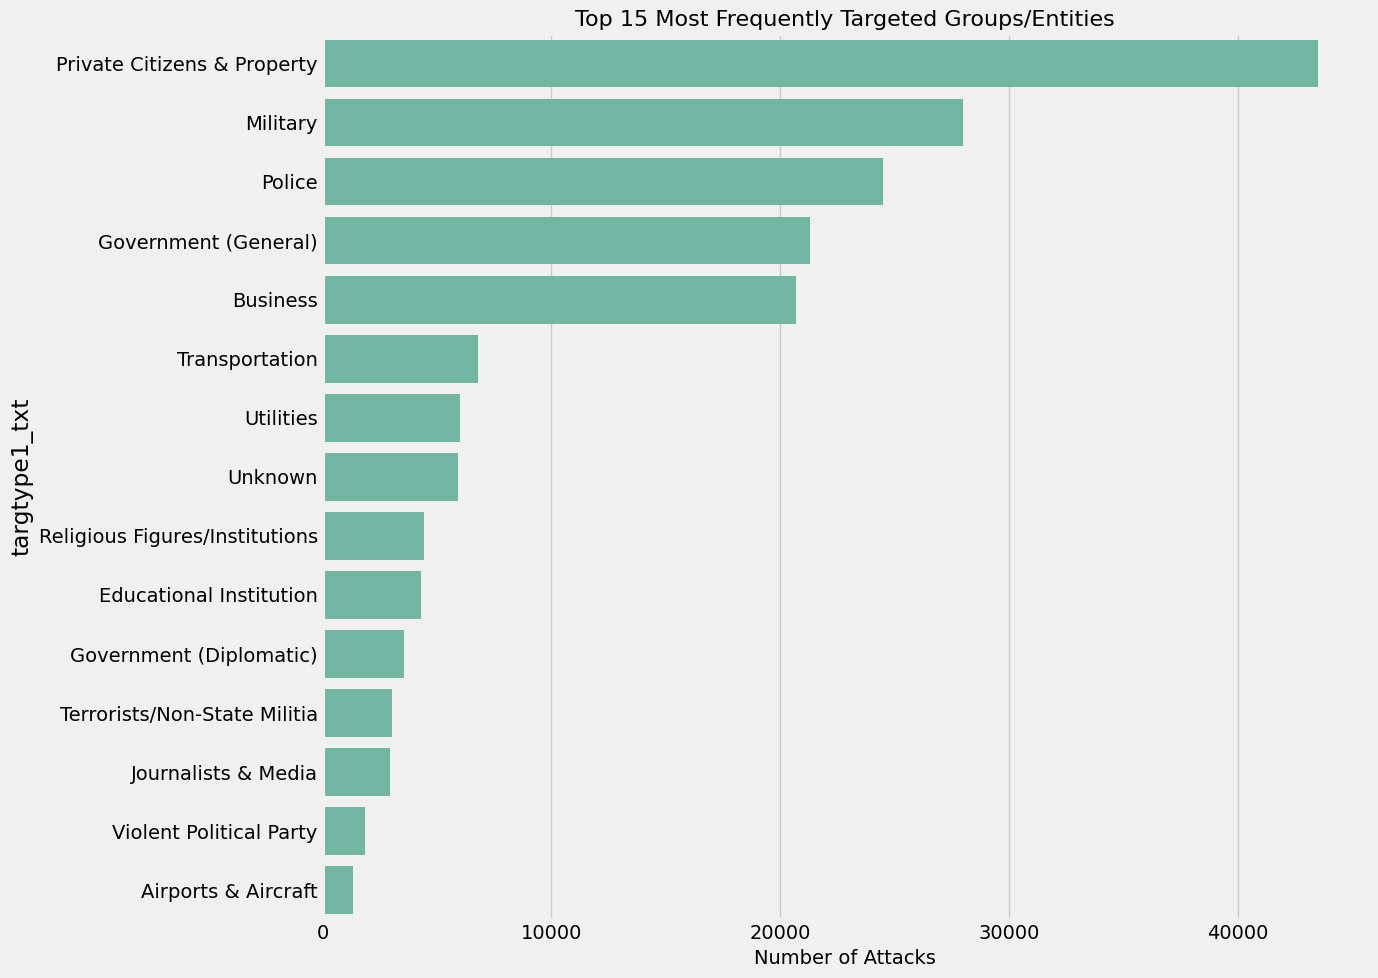

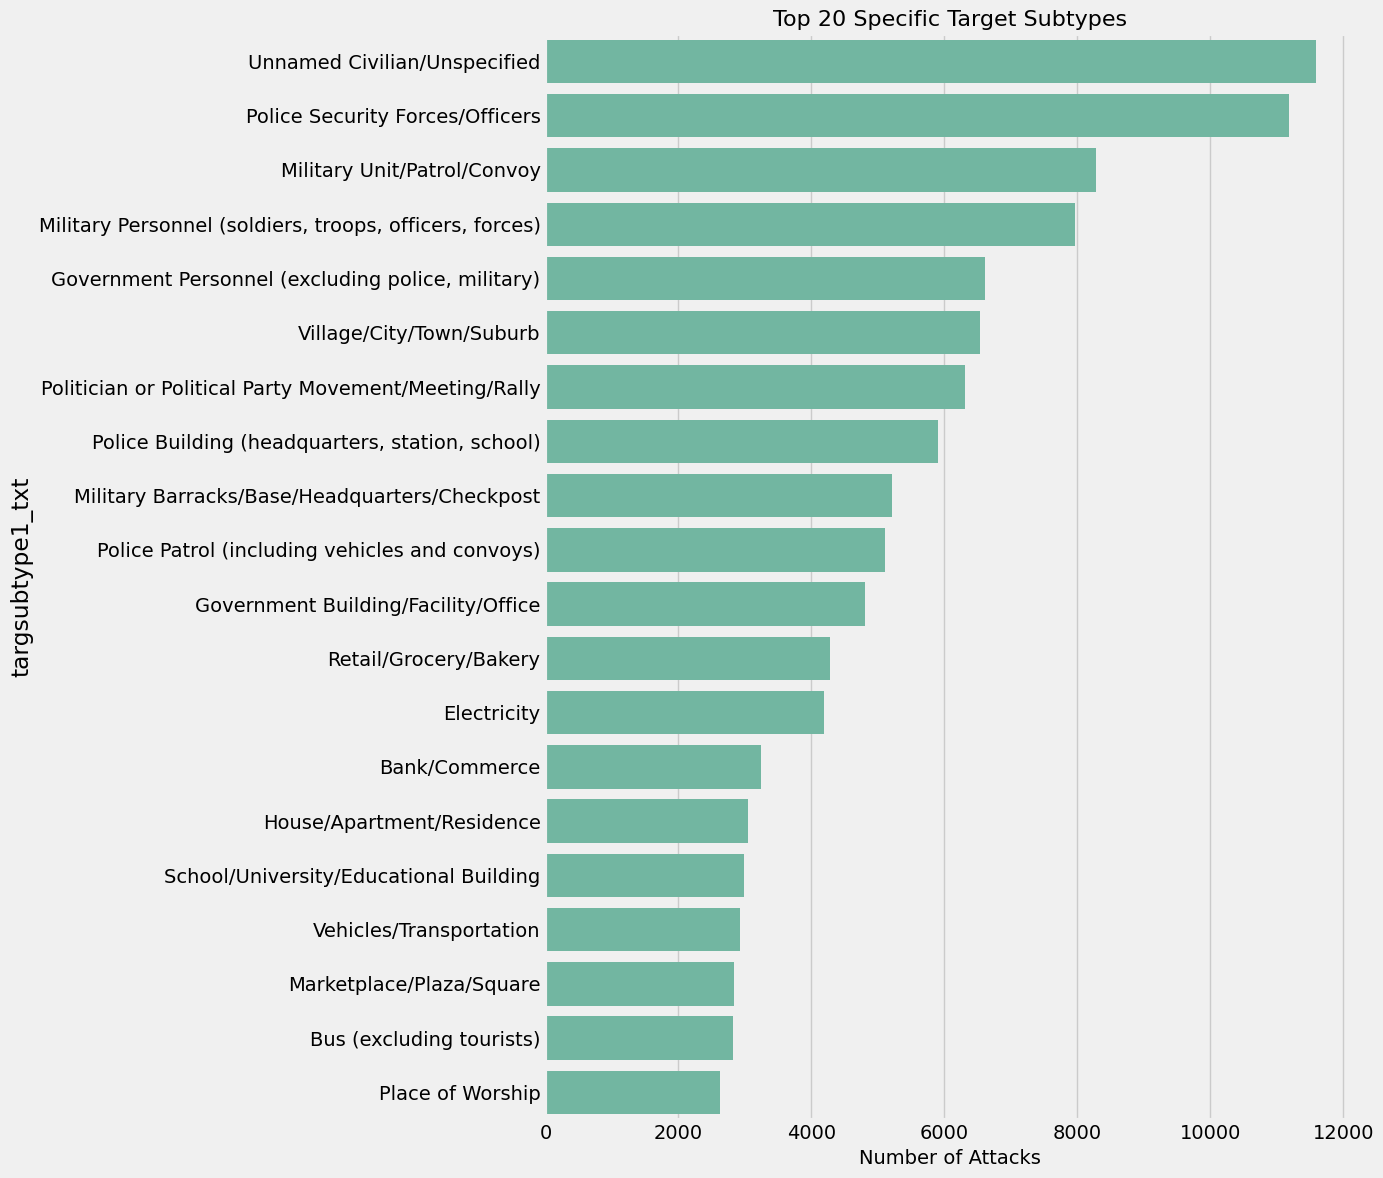

In [ ]:
plt.figure(figsize=(14, 10))
target_counts = df['targtype1_txt'].value_counts().head(15)
sns.barplot(x=target_counts.values, y=target_counts.index)
plt.title('Top 15 Most Frequently Targeted Groups/Entities', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=14)
plt.tight_layout()
plt.show()

if 'targsubtype1_txt' in df.columns:
    plt.figure(figsize=(14, 12))
    subtype_counts = df['targsubtype1_txt'].value_counts().head(20)
    sns.barplot(x=subtype_counts.values, y=subtype_counts.index)
    plt.title('Top 20 Specific Target Subtypes', fontsize=16)
    plt.xlabel('Number of Attacks', fontsize=14)
    plt.tight_layout()
    plt.show()


## 7. Distribution of Attack Methods

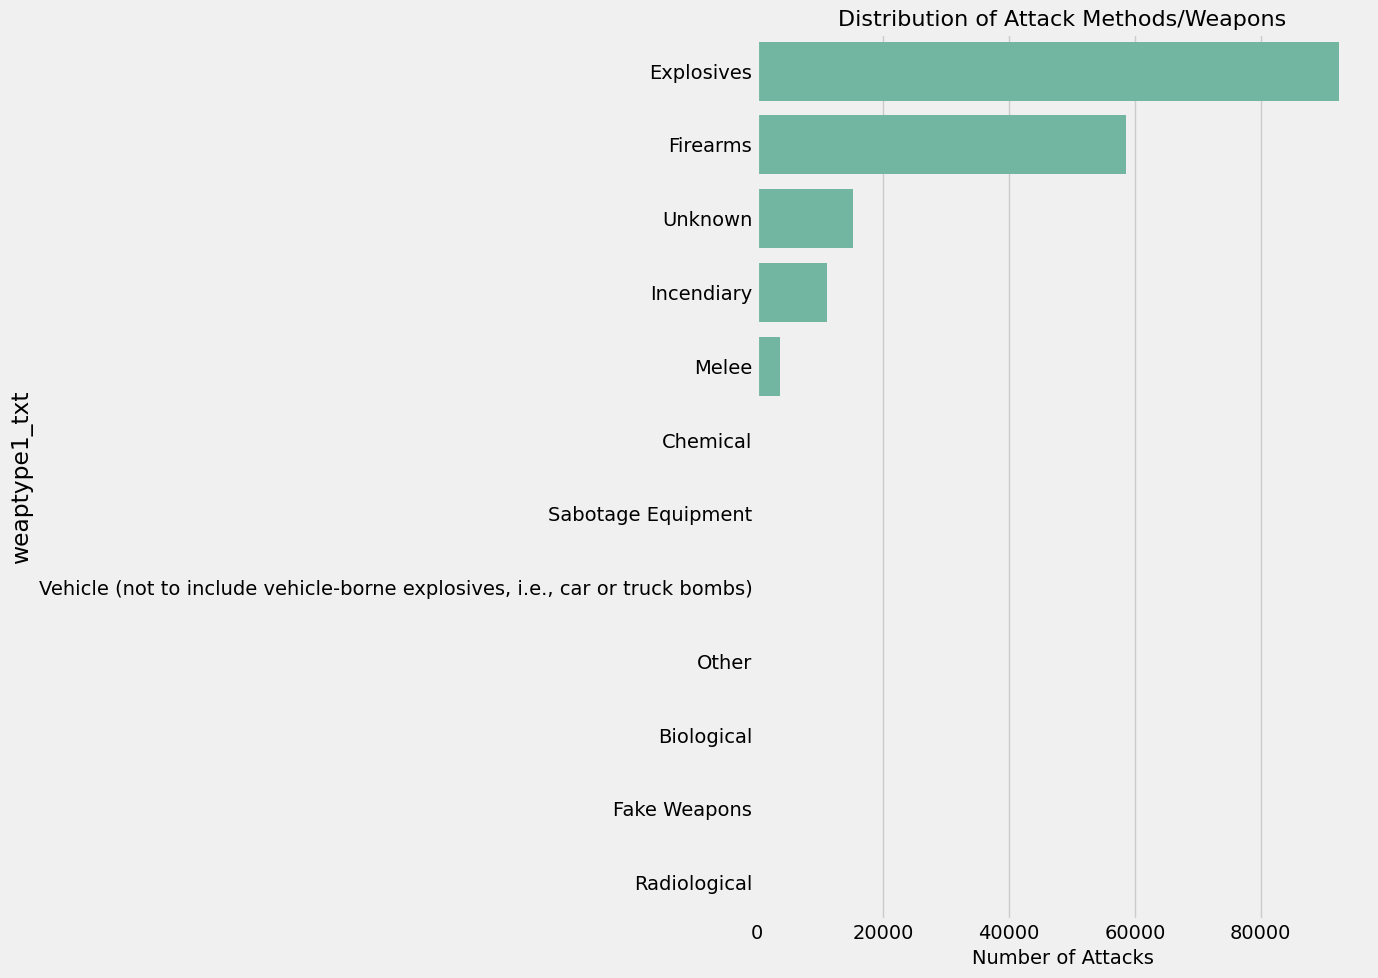

/tmp/ipykernel_51259/1602701101.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

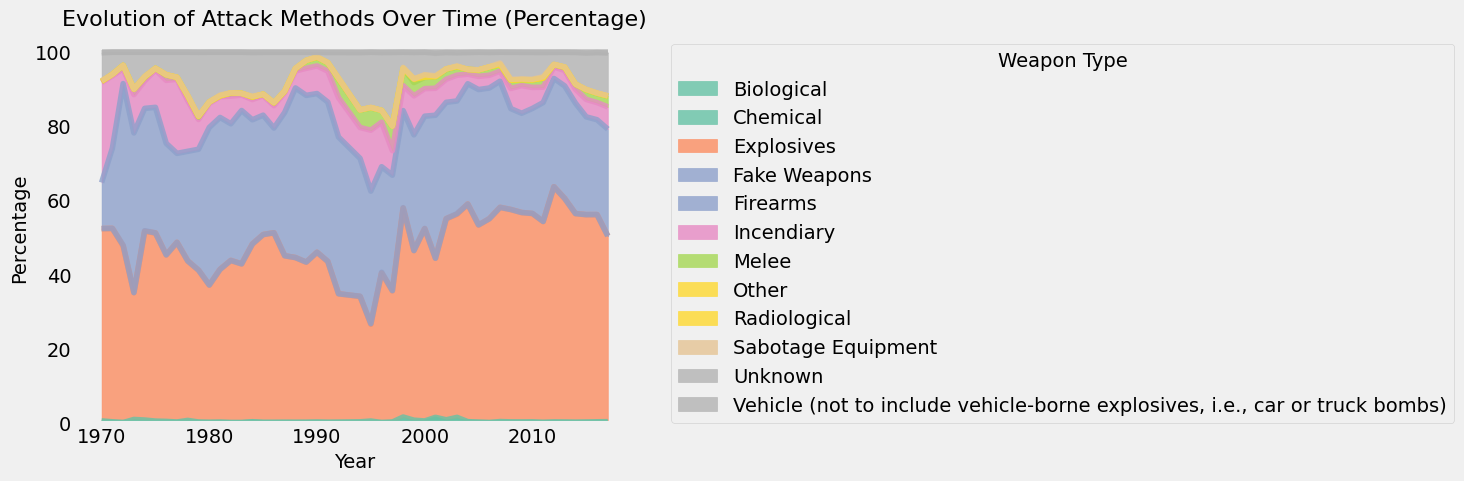

In [ ]:
plt.figure(figsize=(14, 10))
weapon_counts = df['weaptype1_txt'].value_counts()
sns.barplot(x=weapon_counts.values, y=weapon_counts.index)
plt.title('Distribution of Attack Methods/Weapons', fontsize=16)
plt.xlabel('Number of Attacks', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
weapon_year = pd.crosstab(df['iyear'], df['weaptype1_txt'], normalize='index') * 100
weapon_year.plot(kind='area', stacked=True, colormap='Set2', alpha=0.8)
plt.title('Evolution of Attack Methods Over Time (Percentage)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Weapon Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()


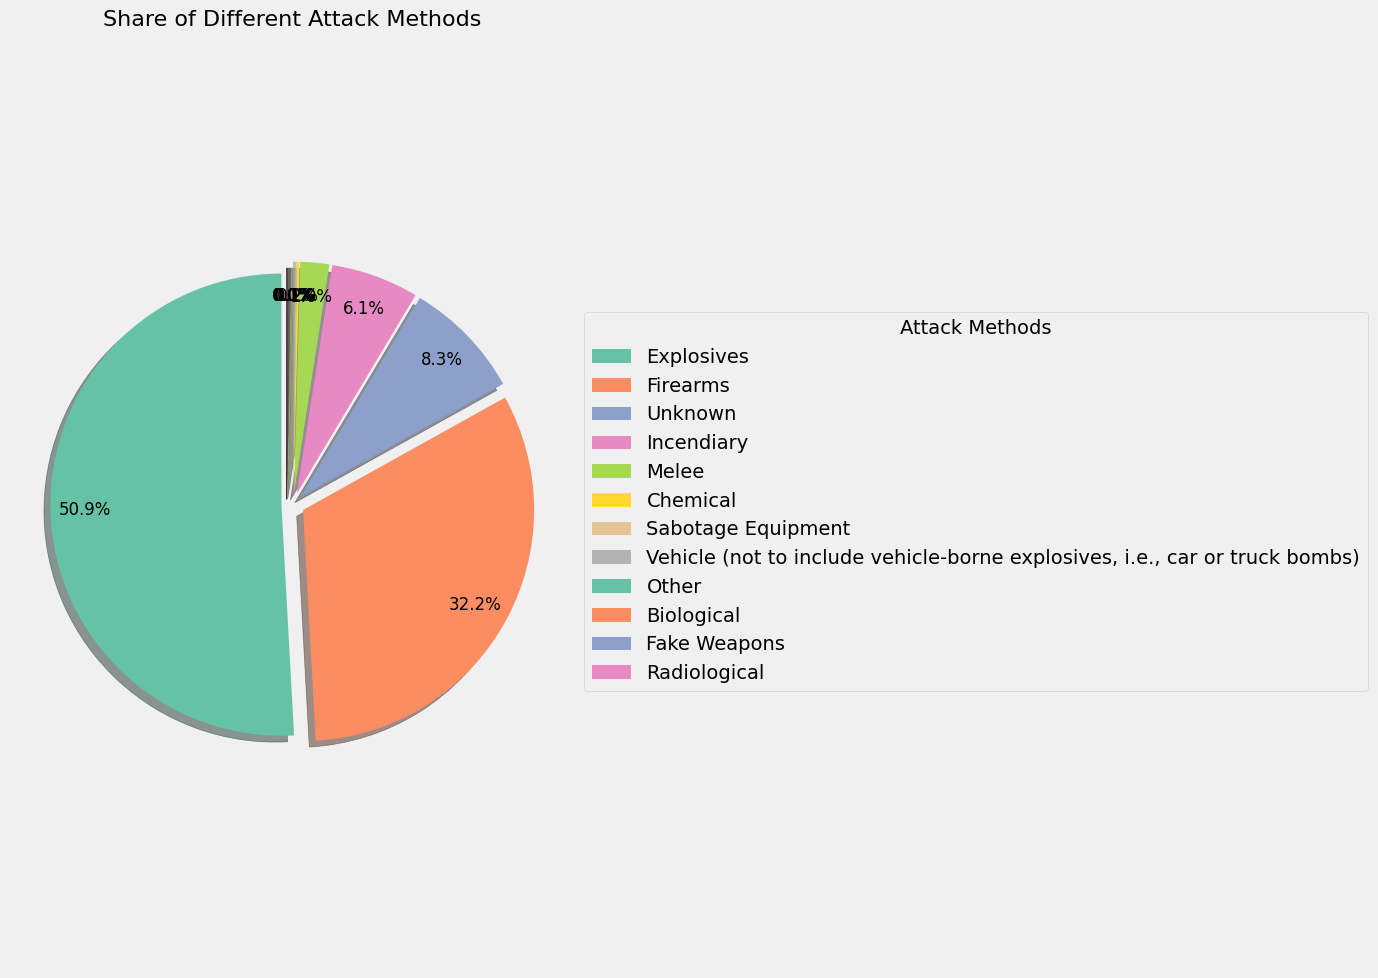

In [ ]:
plt.figure(figsize=(14, 10))

weapon_counts = df['weaptype1_txt'].value_counts()

explode = [0.05] * len(weapon_counts)

wedges, texts, autotexts = plt.pie(
    weapon_counts, 
    explode=explode,
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 12},
    pctdistance=0.85
)

plt.legend(
    wedges,
    weapon_counts.index,
    title="Attack Methods",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Share of Different Attack Methods', fontsize=16)
plt.axis('equal')


plt.subplots_adjust(right=0.7)
plt.tight_layout()
plt.show()
